# Assignment 9: Numerical Integration

#Abstract 

Oftentimes in science it is either hard or computationally costly to evaluate integrals analytically, that's why a veriety of numerical integration methods were developed. In this assignment the following methods are examined: trapezoidal rule, Romberg integration, adaptive quadrature and Gauss quadrature. In the end, Romberg integration was the most efficient method, which allows to compute the integral with the highest precision and the least computational cost. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Introduction

In this assignment we need to approximate the value of the following integral:

$$\int_0^1 x^{10}(2-x)(1-e^{20(x-1)})dx$$

Using the following methods#
* trapezoidal rule
* Romberg integration
* adaptive quadrature
* Gauss quadrature

The following notation is used:
* $a$ - the start of an interval
* $b$ - end of an interval
* $n$ - number of intervals
* $h$ - step size

In [39]:
#Initializing function to be integrated 
def f(x):
  return x**10*(2-x)*(1-np.exp(20*(x-1)))

#Methodology 

##Trapezoidal rule
This is one of the most straightforward methods. It divides integration interval into $n$ subintervals and approximates the value of integral corresponding to each subinterval with a trapezoid. The final formula for this method:
$$I_{trapezoid}=\frac{h}{2}f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n)$$

The error of this method is proportional to $\frac{1}{n^2}$

In [9]:
def trapezoid(a,b,h,f):
  n=int((b-a)/h)
  x=np.linspace(a,b,n+1)
  I=f(x[0])+f(x[n])
  for i in range(1,n):
    I=I+2*f(x[i])
  I=I*h/2
  return I

In [23]:
print(trapezoid(0,1,0.00000001,f))

0.0644618203957803


#Romberg integration

Romberg integration uses values of trapezoidal approximation at different step-sizes and allows to find a better error. The general formula is:
$$I_{j,k}=\frac{4^{k-1}I_{j+1,k-1}-I_{j,k-1}}{4^{k-1}-1}$$

Where $j$ corresponds to "accuracy" of integral, i.e. the higher the $j$, the lower is stepsize. And $k$ represents the level of integration, with each level the error is decreased by $n^2$. In this particular example we calculate values up to $k=4$, meaning the error should behave as $\frac{1}{n^8}$

In [26]:
def romberg(a,b,h,f):
  I1=trapezoid(a,b,h,f)
  I2=trapezoid(a,b,h/2,f)
  I3=trapezoid(a,b,h/4,f)
  I4=trapezoid(a,b,h/8,f)
  J1=(4*I2-I1)/3
  J2=(4*I3-I2)/3
  J3=(4*I4-I3)/3
  K1=(16*J2-J1)/15
  K2=(16*J3-J2)/15
  L1=(64*K2-K1)/63
  return L1

#Adaptive quadrature
This method is recursive: it divides the integration interval into subintervals until each subinterval satisfies the precision requirements. Smallest subintervals are evaluated using Boole's rule, a combination of Simpson's 1/3 rule and Romberg integration scheme.  

In [44]:
def quad_ad(a,b,f,tol):
  h1=(b-a)
  h2=h1/2
  c=(a+b)/2
  d=(a+c)/2
  e=(c+b)/2
  fa=f(a)
  fb=f(b)
  fc=f(c)
  fd=f(d)
  fe=f(e)
  I1=h1/6*(fa+4*fc+fb)
  I2=h2/6*(fa+4*fd+2*fc+4*fe+fb)
  I=0
  if abs(I2-I1)<=tol:
    I=I2+(I2-I1)/15
  else:
    Ia=quad_ad(a,c,f,tol/2)
    Ib=quad_ad(c,b,f,tol/2)
    I=Ia+Ib
  return I


#Gaussian quadrature

This method involves using evaluating function at non-uniformly spaced intervals, by choosing those points and appropriate coefficients it is possible to drastically reduce the amount of computations. In general form:
$$I_{gauss}=\sum_{i=0}^n c_i f(x_i)$$
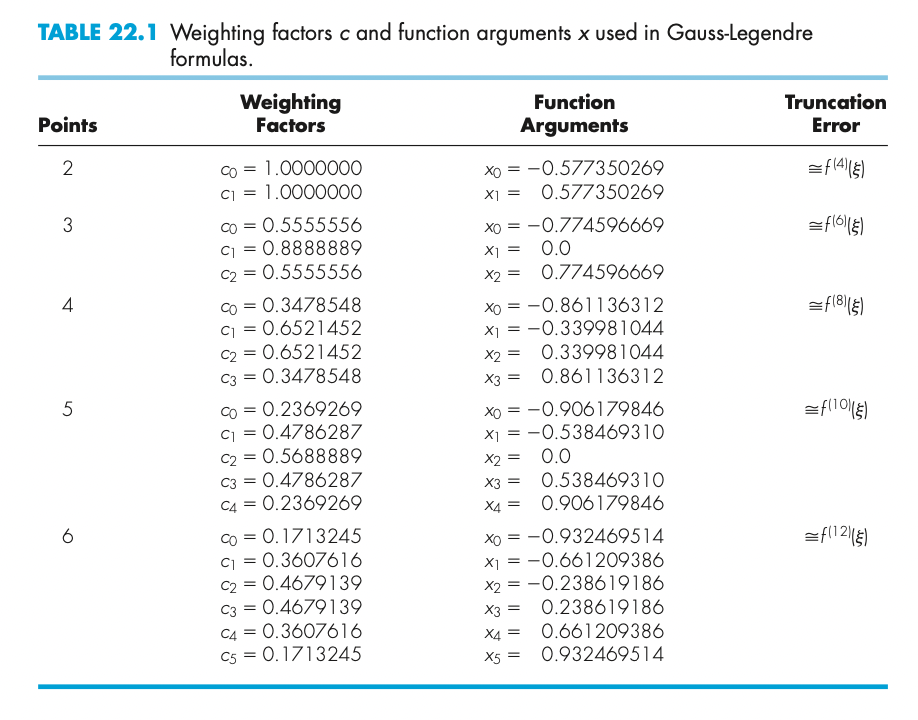

In [60]:
#implementation of gauss quadrature for n=2,3,4,5,6
def gauss2(f):
  return (f((1-0.577350269)/2)+f((1+0.577350269)/2))/2

def gauss3(f):
  return 1/2*(5/9*f((1-0.774596669)/2)+8/9*f(1/2)+5/9*f((1+0.774596669)/2))

def gauss4(f):
  c0=c3=0.3478548
  c1=c2=0.6521454
  x0=-0.861136312
  x1=-0.339981044
  x2=-x1
  x3=-x0
  return 1/2*(c0*f(1/2+x0/2)+c1*f(1/2+x1/2)+c2*f(1/2+x2/2)+c3*f(1/2+x3/2))

def gauss5(f):
  c0=c4=0.2369269
  c1=c3=0.4786287
  c2=0.5688889
  x0=-0.906179846
  x1=-0.538469310
  x2=0
  x3=-x1
  x4=-x0
  return 1/2*(c0*f(1/2+x0/2)+c1*f(1/2+x1/2)+c2*f(1/2+x2/2)+c3*f(1/2+x3/2)+c4*f(1/2+x4/2))

def gauss6(f):
  c=np.zeros(6)
  x=np.zeros(6)
  c[0]=c[5]=0.1713245
  c[1]=c[4]=0.3607616
  c[2]=c[3]=0.4679139
  x[0]=-0.932469514
  x[5]=-x[0]
  x[1]=-0.661209386
  x[4]=-x[1]
  x[2]=-0.238619186
  x[3]=-x[2]
  I=0
  for i in range(6):
    I=I+c[i]*f((1+x[i])/2)
  return I/2


#Results 

The true value of integral calculated with precision of 16 digits is:

$$I_{true}=0.064461820395786$$

This is the maximum precision of Python float variables.

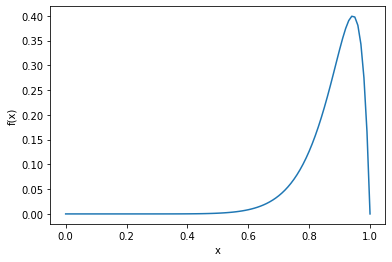

In [62]:
x=np.linspace(0,1,101)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

##Trapezoidal rule
This method is one of the least efficient, since it scales as $\frac{1}{n^2}$ and requires a lot of computations. The best value I could obtain was correct to 15 digits, $n=10^8$ and it took 5 minutes to evaluate. It is theoretically possible to reach higher precision, but at a great computational cost

In [58]:
print(trapezoid(0,1,0.00000001,f))

0.0644618203957803


##Romberg

Romberg integration performs much better than trapezoidal rule since it scales as $\frac{1}{n^8}$.In this example with small $n=1000$, and it allows to achieve maximum precision of 16 digits. The average time to reach this precision is 52.6 ms per loop.


In [63]:
print(romberg(0,1,0.001,f))

0.06446182039578603


In [65]:
%timeit romberg(0,1,0.001,f)

10 loops, best of 5: 52.6 ms per loop


##Adaptive quadrature

This method should perform relatively well, since the left part of the function doesn't change much, therefore it will require small amount of intervals. The average time per loop was 65.6 ms, which is slightly less efficient than Romberg.

In [66]:
print(quad_ad(0,1,f,0.00000000000001))

0.06446182039578609


In [67]:
%timeit quad_ad(0,1,f,0.00000000000001)

10 loops, best of 5: 65.6 ms per loop


#Gaussian quadrature

This method is not very efficient, because the shape of the curve. It is barely changing at the beginning and then has a rapid spike. It is hard for Gauss quadrature to estimate this behaviour even with 6 points.

In [68]:
print("2 points: ", gauss2(f))
print("3 points: ", gauss3(f))
print("4 points: ", gauss4(f))
print("5 points: ", gauss5(f))
print("6 points: ", gauss6(f))

2 points:  0.05556795314561154
3 points:  0.08432839350920526
4 points:  0.07588514542621767
5 points:  0.06826068011917182
6 points:  0.06539884393220682


#Conclusion 
In the end, Romberg integration was the most efficient method, followed closely by adaptive quadrature. Trapezoidal rule is much less efficient in terms of computational cost, and it Gauss quadrature is unsuitable for this particular function. 

If this experiment is repeated with other types of functions, then different results may appear. For some of them adaptive quadrature will give better results, and if the shape is suitable, Gauss quadrature can have a very good precision even with a couple of points. 


#References
* Lectures by Prof. Abdikamalov:
https://www.youtube.com/watch?v=f1KsSaJrY-o
https://www.youtube.com/watch?v=eixp1LQWmt4
* Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers